## Imports

In [1]:
# Importing all the necessary packages

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error
import seaborn as sns
import math

## GDP per Capita v. Population Growth (Failed)

In [2]:
# Using Pandas to read each of these csv files

# GDP growth (annual %)
data_GDP = pd.read_csv('GDP growth (annual %).csv')

# Unemployment, total (% of total labor force) (modeled ILO estimate)
df_unemployed = pd.read_csv("unemployment.csv")

# Population Growth (annual %)
df_populationGrowth = pd.read_csv('Population growth (annual %).csv')

# GDP per capita (current US$)
df_GDPperCapita = pd.read_csv('GDP per capita (current US$).csv')

# Inflation, consumer prices (annual %)
df_inflation = pd.read_csv('inflation.csv')

In [3]:
# Canada X and Y values from the csv file
Canada_x_Demographic = df_GDPperCapita.loc[df_GDPperCapita['Country Name'] == 'Canada', '1990':'2020'].values.tolist()[0]
Canada_y_Population = df_populationGrowth.loc[df_populationGrowth['Country Name'] == 'Canada', '1990':'2020'].values.tolist()[0]

# China X and Y values from the csv file
China_x_Demographic = df_GDPperCapita.loc[df_GDPperCapita['Country Name'] == 'China', '1990':'2020'].values.tolist()[0]
China_y_Population = df_populationGrowth.loc[df_populationGrowth['Country Name'] == 'China', '1990':'2020'].values.tolist()[0]

# US X and Y values from the csv file
US_x_Demographic = df_GDPperCapita.loc[df_GDPperCapita['Country Name'] == 'United States', '1990':'2020'].values.tolist()[0]
US_y_Population = df_populationGrowth.loc[df_populationGrowth['Country Name'] == 'United States', '1990':'2020'].values.tolist()[0]

# France X and Y values from the csv file
France_x_Demographic = df_GDPperCapita.loc[df_GDPperCapita['Country Name'] == 'France', '1990':'2020'].values.tolist()[0]
France_y_Population = df_populationGrowth.loc[df_populationGrowth['Country Name'] == 'France', '1990':'2020'].values.tolist()[0]


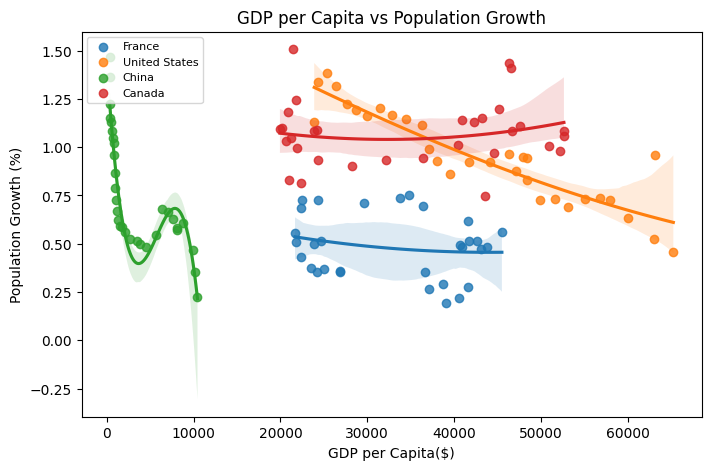

In [4]:
# Create a DataFrame for France data
# The DataFrame has the values for France, in GDP per Capita as x-value and Population Growth as y-value
France_df = pd.DataFrame({'GDP per Capita': France_x_Demographic, 'Population Growth (%)': France_y_Population})

# Create a DataFrame for United States data
# The DataFrame has the values for United States, in GDP per Capita as x-value and Population Growth as y-value
UnitedStates_df = pd.DataFrame({'GDP per Capita': US_x_Demographic, 'Population Growth (%)': US_y_Population})

# Create a DataFrame for China data
#The DataFrame has the values for China, in GDP per Capita as x-value and Population Growth as y-value
China_df = pd.DataFrame({'GDP per Capita': China_x_Demographic, 'Population Growth (%)': China_y_Population})

# Create a DataFrame for Canada data
#The DataFrame has the values for Canada, in GDP per Capita as x-value and Population Growth as y-value
Canada_df = pd.DataFrame({'GDP per Capita': Canada_x_Demographic, 'Population Growth (%)': Canada_y_Population})

# Fit polynomial regression and plot the regression lines
# Specifies the figures width = 10, and height = 6
plt.figure(figsize=(8, 5))

# Plot the graphs using seaborn

# x_value is GDP per Capita, and y_value is Population Growth, the dataframe is France, 
# the order is polynomial therefore order = 2 means its similare to x^2 graph
sns.regplot(x='GDP per Capita', y='Population Growth (%)', data=France_df, order=2, label='France')
# x_value is GDP per Capita, and y_value is Population Growth, the dataframe is United States, 
# the order is polynomial therefore order = 3 means its similar to x^3 graph
sns.regplot(x='GDP per Capita', y='Population Growth (%)', data=UnitedStates_df, order=3, label='United States')
# x_value is GDP per Capita, and y_value is Population Growth, the dataframe is China, 
# the order is polynomial therefore order = 3 means its similar to x^3 graph
sns.regplot(x='GDP per Capita', y='Population Growth (%)', data=China_df, order=3, label='China')
# x_value is GDP per Capita, and y_value is Population Growth, the dataframe is Canada, 
# the order is polynomial therefore order = 2 means its similar to x^2 graph
sns.regplot(x='GDP per Capita', y='Population Growth (%)', data=Canada_df, order=2, label='Canada')

# This code decorates the plot adding labels and a legend

# x_label is GDP per Capita
plt.xlabel('GDP per Capita($)')

# y_label is Population Growth (%)
plt.ylabel('Population Growth (%)')

# The whole plot name is Demographic Transition Theory with Polynomial
plt.title('GDP per Capita vs Population Growth')

# Move the legend to the top left corner
plt.legend(loc='upper left', prop = { "size": 8 })

# This displays the graph
plt.show()


## Inflation Forecast

In [5]:
# Put countries inside a list
countries = ['Canada', 'China', 'France', 'United States']

In [6]:
# Function to filter out every country that is not Canada (35), China (40), France (77), U.S. (251)
def getImportantContries(dataframe):
    new_df = dataframe.iloc[[35, 40, 77, 251]]
    return new_df

# Function for Countries excluding China

def getImportantContries2(dataframe):
    new_df = dataframe.iloc[[35, 77, 251]]
    return new_df

# Function for only China
def getChina(dataframe):
    new_df = dataframe.iloc[[40]]
    return new_df

# Function to extract specific columns from the graph
def dataframe_column_cutter(dataframe,start_position,end_position):
    return dataframe.iloc[:,start_position:end_position]

In [7]:
# Long Term Inflation Dataset
df_inflation1 = getImportantContries(df_inflation)
df_inflation1.index = ['Canada', 'China', 'France', 'United States']
df_inflation1_long_cut = dataframe_column_cutter(df_inflation1,-33,-1)
df_inflation1_long_cut.index = ['Canada', 'China', 'France', 'United States']
df_inflation1_long_cut = df_inflation1_long_cut.T

# China Inflation Dataset
df_china = getChina(df_inflation)
df_china.index = ['China']
df_china_long_cut = dataframe_column_cutter(df_china,-28,-1)
df_china_long_cut.index = ['China']
df_china_long_cut = df_china_long_cut.T

# Canada, France, United States Inflation Dataset
df_inflation2 = getImportantContries2(df_inflation)
df_inflation2.index = ['Canada', 'France', 'United States']
df_inflation2_long_cut = dataframe_column_cutter(df_inflation2,-33,-1)
df_inflation2_long_cut.index = ['Canada', 'France', 'United States']
df_inflation2_long_cut = df_inflation2_long_cut.T

#########################################################################################################

# Long Term Unemployment Dataset
df_unemployed = getImportantContries(df_unemployed)
df_unemployed.index = ['Canada', 'China', 'France', 'United States']
df_unemployed_long_cut = dataframe_column_cutter(df_unemployed,-33,-1)
df_unemployed_long_cut.index = ['Canada', 'China', 'France', 'United States']
df_unemployed_long_cut = df_unemployed_long_cut.T

In [8]:
# Extract x values (from 1991 to 2030)
lis = df_inflation1_long_cut.index
res = np.array([int(i) for i in lis])

# Extract x values (from 1991 to 2030), specifically for Canada, China, and United States
lis1 = df_inflation2_long_cut.index
res1 = np.array([int(i) for i in lis1])

# Extract x values (from 1996 to 2030), specifically for France
lis2 = df_china_long_cut.index
res2 = np.array([int(i) for i in lis2])

# Test if years are properly printed
res

array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:249: LinAlgWarning: Ill-conditioned matrix (rcond=8.42193e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:249: LinAlgWarning: Ill-conditioned matrix (rcond=1.3015e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
Canada Root Mean Squared Error: 1.5
China Root Mean Squared Error: 6.2
France Root Mean Squared Error: 1.8
US Root Mean Squared Error: 1.7


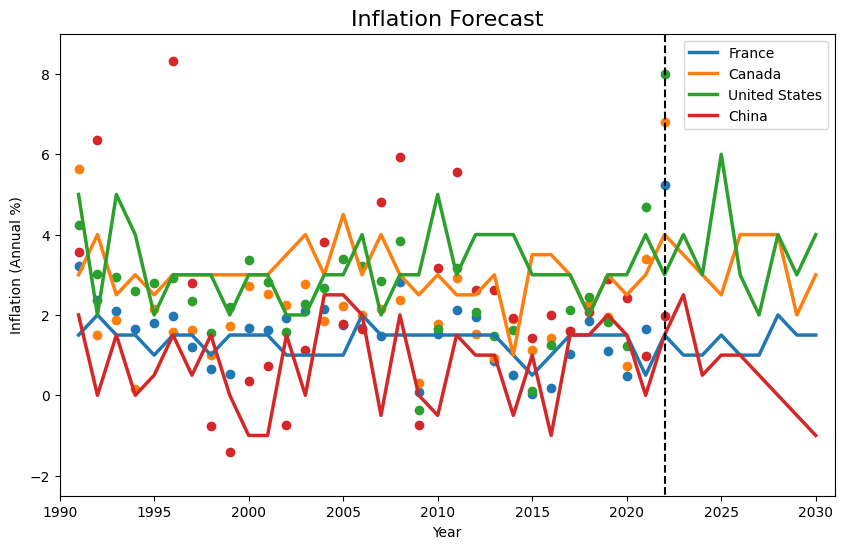

Canada's values: (array([1991., 1992., 1993., 1994., 1995., 1996., 1997., 1998., 1999.,
       2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008.,
       2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017.,
       2018., 2019., 2020., 2021., 2022., 2023., 2024., 2025., 2026.,
       2027., 2028., 2029., 2030.]), array([1.5, 2. , 1.5, 1.5, 1. , 1.5, 1.5, 1. , 1.5, 1.5, 1.5, 1. , 1. ,
       1. , 1. , 2. , 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1. , 0.5, 1. ,
       1.5, 1.5, 1.5, 1.5, 0.5, 1.5, 1. , 1. , 1.5, 1. , 1. , 2. , 1.5,
       1.5]))
France's values: (array([1991., 1992., 1993., 1994., 1995., 1996., 1997., 1998., 1999.,
       2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008.,
       2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017.,
       2018., 2019., 2020., 2021., 2022., 2023., 2024., 2025., 2026.,
       2027., 2028., 2029., 2030.]), array([3. , 4. , 2.5, 3. , 2.5, 3. , 3. , 3. , 3. , 3. , 3. , 3.5, 4. ,
       3. , 4.5, 3. , 4. , 3

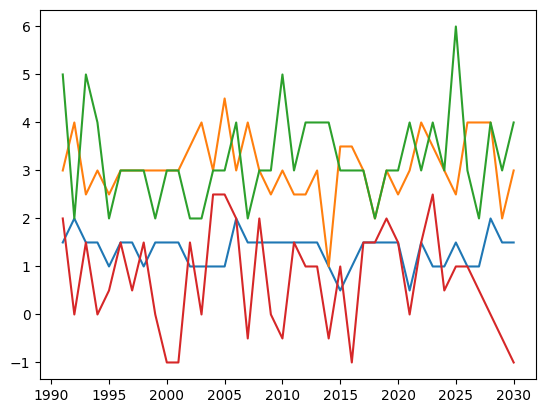

In [9]:
# For Inflation Long Term

# Extract x and y values for each set
# x and y values for France, Canada, United States
x1 = res1
y_in1 = df_inflation2_long_cut.reindex(columns=['France', 'Canada', 'United States'])

# x and y values for China
x2 = res2
y_in2 = df_china_long_cut

# x and y values for all countries, needed for scatter plot
y_in = df_inflation1_long_cut

# Separate list of countries 
countries1 = ['France', 'France', 'United States']
countries2 = ['China']
countries3 = ['France', 'Canada', 'United States', 'China']

# Predicted x Values
x_pred = []
for i in range(1991,2031):
    a = (1/1)*i
    x_pred.append(a)

# Kernel Ridge Regression for Canada, France, and United States
poly_features1 = x1.reshape(-1, 1)
poly_reg_model1 = KernelRidge(alpha=0.0175,kernel='polynomial',degree=2)
poly_reg_model1.fit(poly_features1, y_in1)
y_predicted = poly_reg_model1.predict(poly_features1)

# Predicted values for Canada, France, and United States
x_new1 = np.array(x_pred).reshape(-1,1)
pred_new1 = poly_reg_model1.predict(x_new1)

# Kernel Ridge Regression for China
poly_features2 = x2.reshape(-1, 1)
poly_reg_model2 = KernelRidge(alpha=0.0175,kernel='polynomial',degree=2)
poly_reg_model2.fit(poly_features2, y_in2)
y_predicted = poly_reg_model2.predict(poly_features2)

# Predicted values for China
x_new2 = np.array(x_pred).reshape(-1,1)
pred_new2 = poly_reg_model2.predict(x_new2)

# Establish datasets for RMSE
canada_set = pred_new1[:32,0]
france_set = pred_new1[:32,1]
us_set = pred_new1[:32,2]
china_set = pred_new2[:32,0]

# Individual RMSE for each country
rmse_canada = math.sqrt(mean_squared_error(canada_set, y_in['Canada']))
rmse_china = math.sqrt(mean_squared_error(china_set, y_in['China']))
rmse_france = math.sqrt(mean_squared_error(france_set, y_in['France']))
rmse_us = math.sqrt(mean_squared_error(us_set, y_in['United States']))

# Print RMSE values
print('Canada Root Mean Squared Error: %.1f' % rmse_canada)
print('China Root Mean Squared Error: %.1f' % rmse_china)
print('France Root Mean Squared Error: %.1f' % rmse_france)
print('US Root Mean Squared Error: %.1f' % rmse_us)

# Plot the values and the line
plt.figure(figsize=(10, 6))
plt.title("Inflation Forecast", size=16)
plt.plot(x_new1, pred_new1, linewidth=2.5)
plt.plot(x_new2, pred_new2, linewidth=2.5)
classes = countries3
plt.legend(labels=classes)
for data in countries3:
    plt.scatter(x=res, y=y_in[data])
# Create vertical line to distinguish future values
plt.axvline(x = 2022, ymin = -2.5, ymax = 9, color ='black', linestyle='--')
plt.xlim([1990, 2031])
plt.ylim([-2.5, 9])
plt.xlabel('Year')
plt.ylabel('Inflation (Annual %)')
plt.show()

# Extract Data Points from regression lines
lines1 = plt.plot(x_new1, pred_new1)
lines2 = plt.plot(x_new2, pred_new2)
print("Canada's values: " + str(lines1[0].get_data()))
print("France's values: " + str(lines1[1].get_data()))
print("United States' values: " + str(lines1[2].get_data()))
print("China's values: " + str(lines2[0].get_data()))

## Unemployment Forecast

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:249: LinAlgWarning: Ill-conditioned matrix (rcond=8.42193e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
Canada Root Mean Squared Error: 1.9
China Root Mean Squared Error: 4.7
France Root Mean Squared Error: 4.5
US Root Mean Squared Error: 2.6


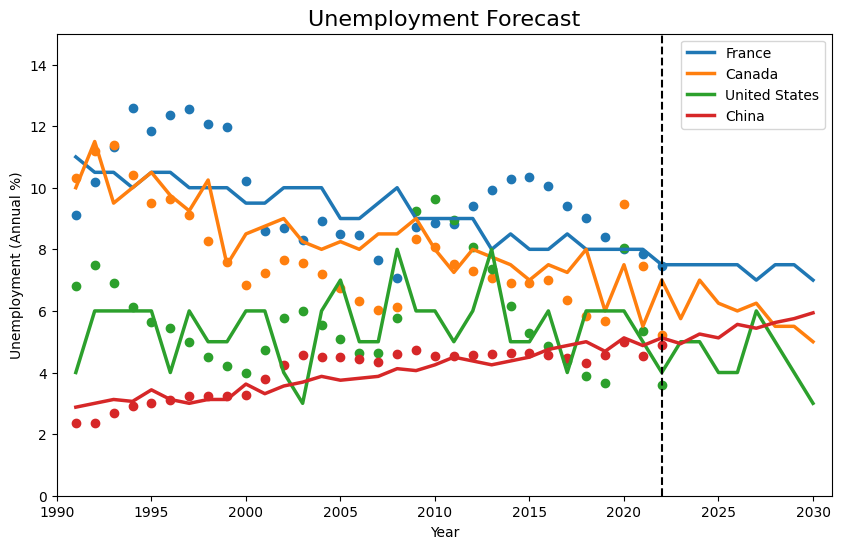

Canada's values: (array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023,
       2024, 2025, 2026, 2027, 2028, 2029, 2030]), array([11. , 10.5, 10.5, 10. , 10.5, 10.5, 10. , 10. , 10. ,  9.5,  9.5,
       10. , 10. , 10. ,  9. ,  9. ,  9.5, 10. ,  9. ,  9. ,  9. ,  9. ,
        8. ,  8.5,  8. ,  8. ,  8.5,  8. ,  8. ,  8. ,  8. ,  7.5,  7.5,
        7.5,  7.5,  7.5,  7. ,  7.5,  7.5,  7. ]))
China's values: (array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023,
       2024, 2025, 2026, 2027, 2028, 2029, 2030]), array([10.  , 11.5 ,  9.5 , 10.  , 10.5 ,  9.75,  9.25, 10.25,  7.5 ,
        8.5 ,  8.75,  9.  ,  8.25,  8.  ,  8.25,  8.  ,  8.5 ,  8.5 ,
        9.  ,  

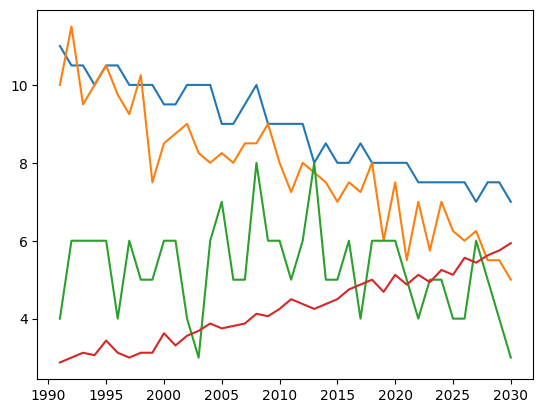

In [10]:
# For Unemployment Long Term

# Extract x and y values for each set
# x and y values for France, Canada, United States, China
x = res
y_em = df_unemployed_long_cut.reindex(columns=['France', 'Canada', 'United States', 'China'])

# Predicted x Values
x_pred = []
for i in range(1991,2031):
    a = 1*i
    x_pred.append(a)

# Kernel Ridge Regression for Canada, China, France, and United States
poly_features = x.reshape(-1, 1)
poly_reg_model = KernelRidge(alpha=0.0175,kernel='polynomial',degree=2)
poly_reg_model.fit(poly_features, y_em)
y_predicted = poly_reg_model.predict(poly_features)

# Predicted values for Canada, China, France, and United States
x_new = np.array(x_pred).reshape(-1,1)
pred_new = poly_reg_model.predict(x_new)

# Establish datasets for RMSE
canada_set = pred_new[:32,0]
china_set = pred_new[:32,1]
france_set = pred_new[:32,2]
us_set = pred_new[:32,3]

# Individual RMSE for each country
rmse_canada = math.sqrt(mean_squared_error(canada_set, y_em['Canada']))
rmse_china = math.sqrt(mean_squared_error(china_set, y_em['China']))
rmse_france = math.sqrt(mean_squared_error(france_set, y_em['France']))
rmse_us = math.sqrt(mean_squared_error(us_set, y_em['United States']))

# Print RMSE values
print('Canada Root Mean Squared Error: %.1f' % rmse_canada)
print('China Root Mean Squared Error: %.1f' % rmse_china)
print('France Root Mean Squared Error: %.1f' % rmse_france)
print('US Root Mean Squared Error: %.1f' % rmse_us)

# Plot the values and the line
plt.figure(figsize=(10, 6))
plt.title("Unemployment Forecast", size=16)

plt.plot(x_new, pred_new, linewidth=2.5)
classes = countries3
plt.legend(labels=classes)
for data in countries3:
    plt.scatter(x=res, y=y_em[data])
# Create vertical line to distinguish future values
plt.axvline(x = 2022, ymin = 0, ymax = 15, color ='black', linestyle='--')
plt.xlim([1990, 2031])
plt.ylim([0, 15])
plt.xlabel('Year')
plt.ylabel('Unemployment (Annual %)')
plt.show()

# Extract Data Points from regression lines
lines = plt.plot(x_new, pred_new)
print("Canada's values: " + str(lines[0].get_data()))
print("China's values: " + str(lines[1].get_data()))
print("France's values: " + str(lines[2].get_data()))
print("United States' values: " + str(lines[3].get_data()))

## Phillips Curve (Failed)

<function matplotlib.pyplot.show(close=None, block=None)>

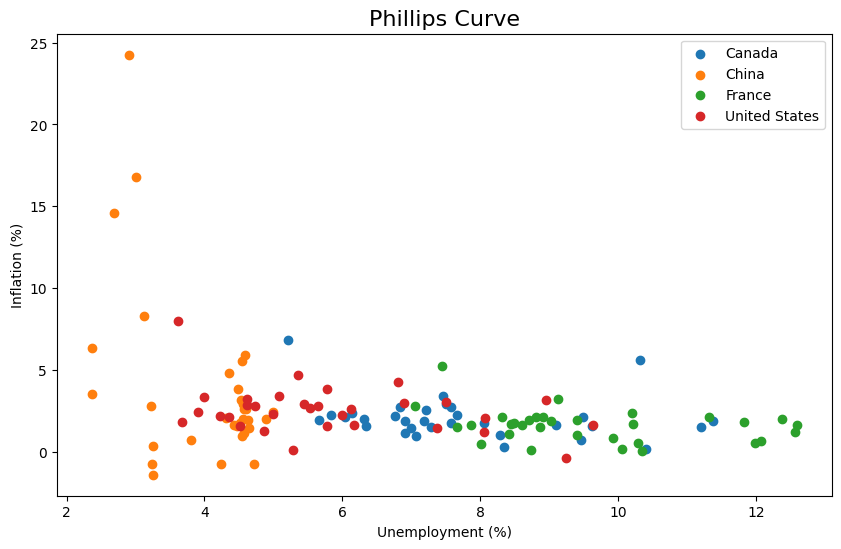

In [11]:
# Make the Phillips Curve

plt.figure(figsize=(10, 6))
plt.title("Phillips Curve", size=16)
for data in countries:
    plt.scatter(x=y_em[data], y=y_in[data])
classes = countries
plt.legend(labels=classes)
plt.xlabel('Unemployment (%)')
plt.ylabel('Inflation (%)')
plt.show

## Population Growth (Combination Plot)

Projected Population Growth in 2030:
France: -0.43%
Canada: 1.11%
United States: 0.49%
China: -0.24%


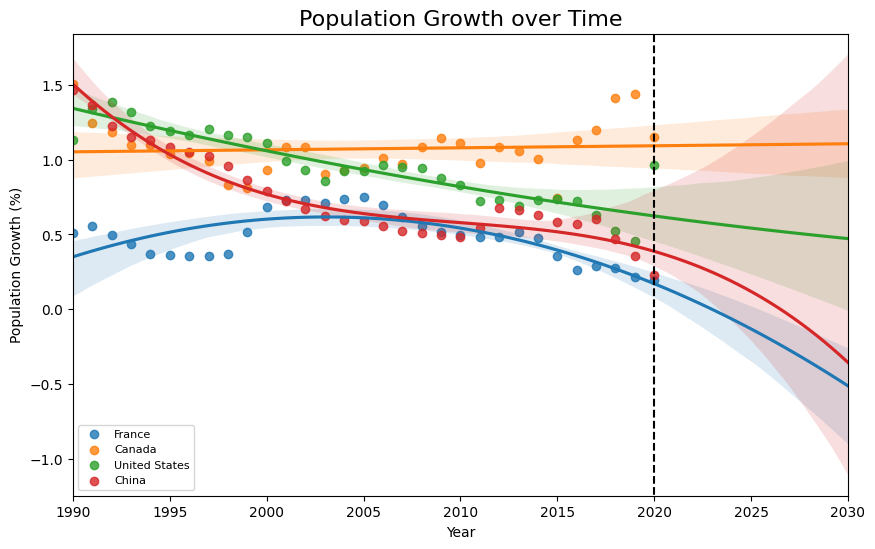

In [49]:
# Define the degrees of the polynomial regression for each country
degree_france = 2
degree_us = 2
degree_china = 3
degree_canada = 1

# Fit polynomial regression for each country
poly_france = PolynomialFeatures(degree=degree_france, include_bias=False)
poly_us = PolynomialFeatures(degree=degree_us, include_bias=False)
poly_china = PolynomialFeatures(degree=degree_china, include_bias=False)
poly_canada = PolynomialFeatures(degree=degree_canada, include_bias=False)

# France
x = np.array(list(range(1990, 2021))).reshape(-1, 1)
y_france = np.array(France_y_Population).reshape(-1, 1)
x_future = np.array(list(range(1990, 2030))).reshape(-1, 1)
poly_features_france = poly_france.fit_transform(x)
poly_future_france = poly_france.transform(x_future)
model_france = LinearRegression()
model_france.fit(poly_features_france, y_france)
y_predicted_france = model_france.predict(poly_features_france)
y_predicted_future_france = model_france.predict(poly_future_france)

# Repeat the above steps for other countries (United States, China, Canada)

# United States
y_us = np.array(US_y_Population).reshape(-1, 1)
poly_features_us = poly_us.fit_transform(x)
poly_future_us = poly_us.transform(x_future)
model_us = LinearRegression()
model_us.fit(poly_features_us, y_us)
y_predicted_us = model_us.predict(poly_features_us)
y_predicted_future_us = model_us.predict(poly_future_us)

# China
y_china = np.array(China_y_Population).reshape(-1, 1)
poly_features_china = poly_china.fit_transform(x)
poly_future_china = poly_china.transform(x_future)
model_china = LinearRegression()
model_china.fit(poly_features_china, y_china)
y_predicted_china = model_china.predict(poly_features_china)
y_predicted_future_china = model_china.predict(poly_future_china)

# Canada
y_canada = np.array(Canada_y_Population).reshape(-1, 1)
poly_features_canada = poly_canada.fit_transform(x)
poly_future_canada = poly_canada.transform(x_future)
model_canada = LinearRegression()
model_canada.fit(poly_features_canada, y_canada)
y_predicted_canada = model_canada.predict(poly_features_canada)
y_predicted_future_canada = model_canada.predict(poly_future_canada)


# Plot the regression lines and predicted values for each country
plt.figure(figsize=(10, 6))
plt.xlim(1990, 2030)

# France
sns.regplot(x=x.flatten(), y=y_france.flatten(), order=degree_france, label='France', color = 'tab:blue' ,  truncate=False)
# Canada
sns.regplot(x=x.flatten(), y=y_canada.flatten(), order=degree_canada, label='Canada', color = 'tab:orange', truncate=False)
# United States
sns.regplot(x=x.flatten(), y=y_us.flatten(), order=degree_us, label='United States' , color = 'tab:green', truncate=False)
# China
sns.regplot(x=x.flatten(), y=y_china.flatten(), order=degree_china, label='China' , color = 'tab:red', truncate=False)

# Print the predicted values
print("Projected Population Growth in 2030:")
print("France: %.2f%%" % y_predicted_future_france[-1])
print("Canada: %.2f%%" % y_predicted_future_canada[-1])
print("United States: %.2f%%" % y_predicted_future_us[-1])
print("China: %.2f%%" % y_predicted_future_china[-1])

# Decorate the plot
plt.xlabel('Year')
plt.ylabel('Population Growth (%)')
plt.title('Population Growth over Time', size=16)
plt.legend(loc='lower left', prop = { "size": 8 })
# Create vertical line to distinguish future values
plt.axvline(x = 2020, ymin = -15, ymax = 15, color ='black', linestyle='--')

# Display the graph
plt.show()


## GDP per Capita (Combination Plot)

Projected GDP per Capita in 2030:
France: $51967.57
Canada: $55132.96
United States: $78802.10
China: $20090.34


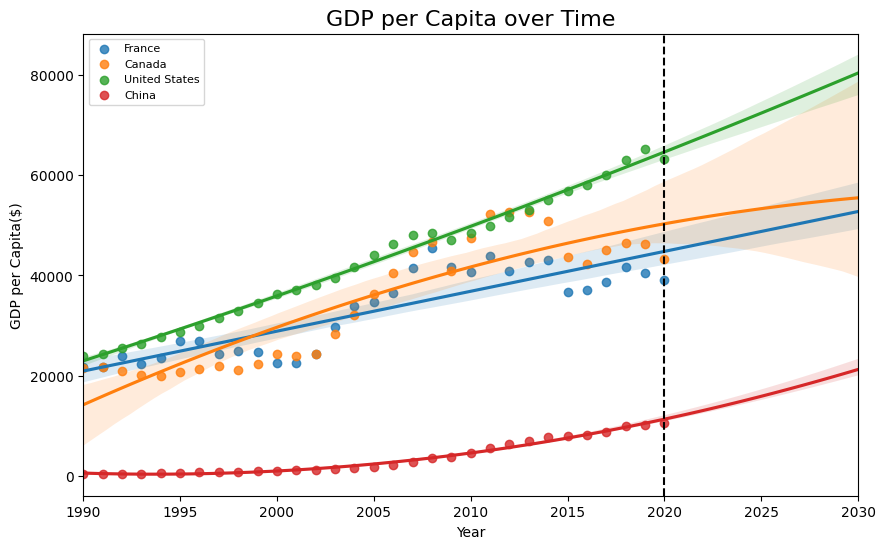

In [48]:
# Define the degrees of the polynomial regression for each country
degree_france = 1
degree_us = 2
degree_china = 2
degree_canada = 2

# Fit polynomial regression for each country
poly_france = PolynomialFeatures(degree=degree_france, include_bias=False)
poly_us = PolynomialFeatures(degree=degree_us, include_bias=False)
poly_china = PolynomialFeatures(degree=degree_china, include_bias=False)
poly_canada = PolynomialFeatures(degree=degree_canada, include_bias=False)

# France
x = np.array(list(range(1990, 2021))).reshape(-1, 1)
y_france = np.array(France_x_Demographic).reshape(-1, 1)
x_future = np.array(list(range(1990, 2030))).reshape(-1, 1)
poly_features_france = poly_france.fit_transform(x)
poly_future_france = poly_france.transform(x_future)
model_france = LinearRegression()
model_france.fit(poly_features_france, y_france)
y_predicted_france = model_france.predict(poly_features_france)
y_predicted_future_france = model_france.predict(poly_future_france)

# Repeat the above steps for other countries (United States, China, Canada)

# United States
y_us = np.array(US_x_Demographic).reshape(-1, 1)
poly_features_us = poly_us.fit_transform(x)
poly_future_us = poly_us.transform(x_future)
model_us = LinearRegression()
model_us.fit(poly_features_us, y_us)
y_predicted_us = model_us.predict(poly_features_us)
y_predicted_future_us = model_us.predict(poly_future_us)

# China
y_china = np.array(China_x_Demographic).reshape(-1, 1)
poly_features_china = poly_china.fit_transform(x)
poly_future_china = poly_china.transform(x_future)
model_china = LinearRegression()
model_china.fit(poly_features_china, y_china)
y_predicted_china = model_china.predict(poly_features_china)
y_predicted_future_china = model_china.predict(poly_future_china)

# Canada
y_canada = np.array(Canada_x_Demographic).reshape(-1, 1)
poly_features_canada = poly_canada.fit_transform(x)
poly_future_canada = poly_canada.transform(x_future)
model_canada = LinearRegression()
model_canada.fit(poly_features_canada, y_canada)
y_predicted_canada = model_canada.predict(poly_features_canada)
y_predicted_future_canada = model_canada.predict(poly_future_canada)


# Plot the regression lines and predicted values for each country
plt.figure(figsize=(10, 6))
plt.xlim(1990, 2030)

# France
sns.regplot(x=x.flatten(), y=y_france.flatten(), order=degree_france, label='France', color = 'tab:blue', truncate=False)
# Canada
sns.regplot(x=x.flatten(), y=y_canada.flatten(), order=degree_canada, label='Canada', color = 'tab:orange', truncate=False)
# United States
sns.regplot(x=x.flatten(), y=y_us.flatten(), order=degree_us, label='United States', color = 'tab:green', truncate=False)
# China
sns.regplot(x=x.flatten(), y=y_china.flatten(), order=degree_china, label='China', color = 'tab:red',  truncate=False)

print("Projected GDP per Capita in 2030:")
print("France: $%.2f" % y_predicted_future_france[-1])
print("Canada: $%.2f" % y_predicted_future_canada[-1])
print("United States: $%.2f" % y_predicted_future_us[-1])
print("China: $%.2f" % y_predicted_future_china[-1])

# Decorate the plot
plt.xlabel('Year')
plt.ylabel('GDP per Capita($)')
plt.title('GDP per Capita over Time', size=16)
plt.legend(loc='upper left', prop = { "size": 8 })
# Create vertical line to distinguish future values
plt.axvline(x = 2020, ymin = 0, ymax = 100000, color ='black', linestyle='--')

# Display the graph
plt.show()


## Output Gap

In [14]:
# Function to filter out every country that is not China (40)
def getChina(dataframe):
    new_df = dataframe.iloc[40]
    return new_df

In [15]:
# Read in Output Gap Files for US, Canada, and France
# US data is quarterly and Canada/France is yearly. US can be coverted to yearly.
US_output_gap = pd.read_csv("US_quarterly_output_gap.csv")
Canada_output_gap = pd.read_csv("Canada_yearly_output_gap.csv")
France_output_gap = pd.read_csv("France_yearly_output_gap.csv")

# China requires preprocessing to get the projected GDP
# The projected GDP change (%) was available, so this is used to find the projected GDP
# The projected GDP change was only available from 2013 to 2021
China_GDP_Projected_Percent_Change = pd.read_csv("China GDP Projected Growth Percentage.csv")

# Get actual Chinese GDP for relevant years
China_actual_GDP = pd.read_csv("GDP (current US$).csv")
China_actual_GDP = getChina(China_actual_GDP)

# Get GDP from 2013 to 2021, lining the years up with the years for which projected GDP change is given
China_actual_GDP = China_actual_GDP.iloc[-9:-1]
China_actual_GDP['2021'] = 15600000000000.0
print(China_actual_GDP)
# Merge the Actual GDP into the projected GDP and set the index to the year                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      nto the Projected Percent Change Dataframe
China_GDP_Projected_Percent_Change.set_index('Year', inplace= True)
China_GDP_Projected_Percent_Change['China Actual GDP'] = list(China_actual_GDP)
China_GDP_Projected_Percent_Change

2013     9570000000000.0
2014    10500000000000.0
2015    11100000000000.0
2016    11200000000000.0
2017    12300000000000.0
2018    13900000000000.0
2019    14300000000000.0
2020    14700000000000.0
2021    15600000000000.0
Name: 40, dtype: object


,Projectd GDP Growth Percentage,China Actual GDP
Year,,
2013,8.231,9.570000e+12
2014,7.745,1.050000e+13
2015,7.248,1.110000e+13
2016,6.750,1.120000e+13
2017,6.242,1.230000e+13
2018,5.827,1.390000e+13
2019,5.620,1.430000e+13
2020,5.310,1.470000e+13
2021,5.124,1.560000e+13


In [16]:
# Find Projected GDP Values
 
first_projection = China_actual_GDP[0]
projections = [first_projection]
for year in range(1,9):
    #print(China_GDP_Projected_Percent_Change['Projectd GDP Growth Percentage'].iloc[1])
    first_projection = first_projection * (1 + (China_GDP_Projected_Percent_Change['Projectd GDP Growth Percentage'].iloc[year])/100)
    projections.append(first_projection)
print(projections)
China_GDP_Projected_Percent_Change['China Projected GDP'] = projections

# Drop the Projected GDP Growth for China; it is not necessary anymore. Rename the dataframe to Output Gap
Output_Gap = China_GDP_Projected_Percent_Change.drop('Projectd GDP Growth Percentage', axis= 1)
Output_Gap

[9570000000000.0, 10311196500000.0, 11058552022320.002, 11805004283826.602, 12541872651223.057, 13272687570609.824, 14018612612078.098, 14763000941779.443, 15519457110036.22]


,China Actual GDP,China Projected GDP
Year,,
2013,9.570000e+12,9.570000e+12
2014,1.050000e+13,1.031120e+13
2015,1.110000e+13,1.105855e+13
2016,1.120000e+13,1.180500e+13
2017,1.230000e+13,1.254187e+13
2018,1.390000e+13,1.327269e+13
2019,1.430000e+13,1.401861e+13
2020,1.470000e+13,1.476300e+13
2021,1.560000e+13,1.551946e+13


In [17]:
# Find the Output Gap by finding the percent difference between the potential and actual GDP for each year

Output_Gap['China Output Gap'] = 100 * ((Output_Gap['China Actual GDP'] - Output_Gap['China Projected GDP']) / Output_Gap['China Projected GDP'])
Output_Gap

,China Actual GDP,China Projected GDP,China Output Gap
Year,,,
2013,9.570000e+12,9.570000e+12,0.000000
2014,1.050000e+13,1.031120e+13,1.831053
2015,1.110000e+13,1.105855e+13,0.374805
2016,1.120000e+13,1.180500e+13,-5.124981
2017,1.230000e+13,1.254187e+13,-1.928521
2018,1.390000e+13,1.327269e+13,4.726341
2019,1.430000e+13,1.401861e+13,2.007241
2020,1.470000e+13,1.476300e+13,-0.426749
2021,1.560000e+13,1.551946e+13,0.518980


In [18]:
# Get the Final Quarter Output Gap Measurements for the US and prepare the indices to be combined into the Output Gap dataframe
US_output_gap = US_output_gap.iloc[167:292:4]
new_indices = [year for year in range(1990,2022)]
US_output_gap.index = new_indices
US_output_gap

,DATE,GDPC1_GDPPOT
1990,1990-10-01,-2.4401623335169715
1991,1991-10-01,-3.7446889183886663
1992,1992-10-01,-2.0427175524883458
1993,1993-10-01,-2.1148800111028025
1994,1994-10-01,-0.77951503872791316151
1995,1995-10-01,-1.29222419891487926257
1996,1996-10-01,0.01216027571348605548
1997,1997-10-01,0.72806069207938785812
1998,1998-10-01,1.45909103222840990618
1999,1999-10-01,2.0146406851298987


In [19]:
# Prepare Canada Dataframe to be merged into the Output Gap Dataframe
# Reverse Canada Dataframe order so that it goes from past to present
Canada_output_gap = Canada_output_gap.iloc[::-1]
# Drop all rows not in the 1990-2021 years
Canada_output_gap = Canada_output_gap[10:-3]
print(Canada_output_gap)
# Use same indices that were used for the US Output Gap index change
Canada_output_gap.index = new_indices
Canada_output_gap

          Date  Value
34  1990-12-31  1.258
33  1991-12-31 -1.507
32  1992-12-31 -2.401
31  1993-12-31 -2.074
30  1994-12-31 -0.421
29  1995-12-31 -0.806
28  1996-12-31 -2.325
27  1997-12-31 -1.497
26  1998-12-31 -1.251
25  1999-12-31  0.154
24  2000-12-31  1.524
23  2001-12-31 -0.306
22  2002-12-31 -0.350
21  2003-12-31 -0.902
20  2004-12-31 -0.097
19  2005-12-31  0.853
18  2006-12-31  1.298
17  2007-12-31  1.525
16  2008-12-31  0.748
15  2009-12-31 -3.550
14  2010-12-31 -1.748
13  2011-12-31 -0.473
12  2012-12-31 -1.178
11  2013-12-31 -1.298
10  2014-12-31 -0.823
9   2015-12-31 -2.052
8   2016-12-31 -2.399
7   2017-12-31 -0.799
6   2018-12-31 -0.525
5   2019-12-31 -0.370
4   2020-12-31  0.087
3   2021-12-31  0.276


,Date,Value
1990,1990-12-31,1.258
1991,1991-12-31,-1.507
1992,1992-12-31,-2.401
1993,1993-12-31,-2.074
1994,1994-12-31,-0.421
1995,1995-12-31,-0.806
1996,1996-12-31,-2.325
1997,1997-12-31,-1.497
1998,1998-12-31,-1.251
1999,1999-12-31,0.154


In [20]:
# Prepare France Dataframe to be merged into the Output Gap Dataframe
France_output_gap = France_output_gap.iloc[::-1]
# Drop all rows not in the 1990-2021 years
France_output_gap = France_output_gap[10:-3]
# Use same indices that were used for the US Output Gap index change
France_output_gap.index = new_indices
France_output_gap
# Change France's Output Gap name so that there aren't column name issues when merging
France_output_gap.rename(columns={'Value': 'France Output Gap'}, inplace=True)

In [21]:
# Combine US Output GAP into Output Gap dataframe
Output_Gap= pd.concat([Output_Gap, US_output_gap, Canada_output_gap, France_output_gap], axis=1)
Output_Gap = Output_Gap.iloc[:,[2,4,6,-1]]
Output_Gap.rename(columns={'GDPC1_GDPPOT': 'US Output Gap','Value': 'Canada Output Gap'}, inplace=True)
#Output_Gap = Output_Gap[Output_Gap['Canada Output Gap','China Output Gap','France Output Gap','US Output Gap',]]
#Output_Gap
#Canada Output Gap.2,US Output Gap,
#Output_Gap.iloc[:,[2,4,6,-1]]

In [22]:
# Covnert Columns to float64 so that they are graphable
Output_Gap = Output_Gap.astype('float64')
Output_Gap

,China Output Gap,US Output Gap,Canada Output Gap,France Output Gap
1990,NaN,-2.440162,1.258,1.849
1991,NaN,-3.744689,-1.507,0.823
1992,NaN,-2.042718,-2.401,0.471
1993,NaN,-2.114880,-2.074,-1.863
1994,NaN,-0.779515,-0.421,-1.462
1995,NaN,-1.292224,-0.806,-1.356
1996,NaN,0.012160,-2.325,-2.015
1997,NaN,0.728061,-1.497,-1.962
1998,NaN,1.459091,-1.251,-0.881
1999,NaN,2.014641,0.154,0.023


/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/algorithms.py:98: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/algorithms.py:98: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/algorithms.py:98: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/algorithms.py:98: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/algorithms.py:98: RankWarning: Polyfit may be poorly conditioned
  boot_dist.append(f(*sample, **func_kwargs))
/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/algorithms.py:98: RankWarning: Polyfit may be poorly conditioned
  boot_d

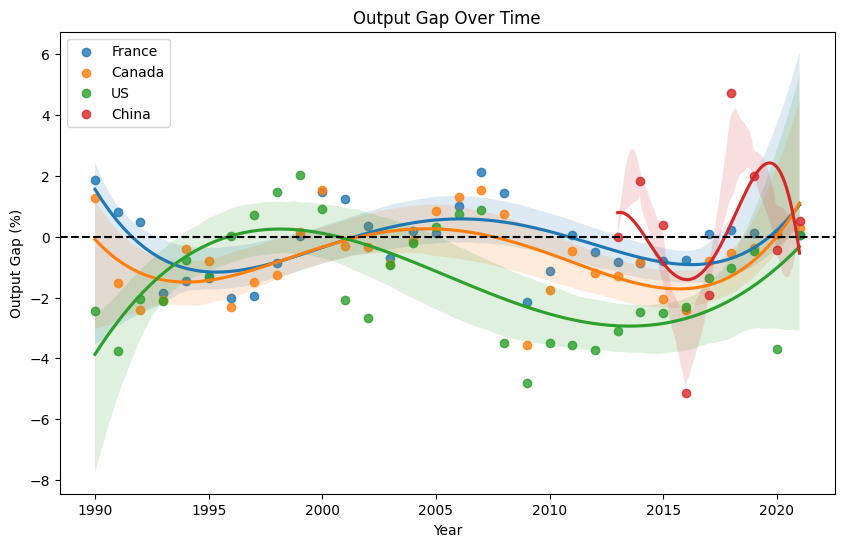

In [23]:
# Establish figure size
plt.figure(figsize=(10, 6))

# Plots of all data
sns.regplot(x=Output_Gap.index, y=Output_Gap['France Output Gap'], order = 4, marker='o', label='France', color='tab:blue')
sns.regplot(x=Output_Gap.index, y=Output_Gap['Canada Output Gap'], order = 4, marker='o', label='Canada', color='tab:orange')
sns.regplot(x=Output_Gap.index, y=Output_Gap['US Output Gap'], order = 4, marker='o', label='US', color='tab:green')
sns.regplot(x=Output_Gap.index[-9:], y=Output_Gap['China Output Gap'].dropna(), order = 4, marker='o', ci = 30, label='China', color='tab:red')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Output Gap (%)')
plt.title('Output Gap Over Time')

# Add legend
plt.legend()

# Add a lien at y=0 to show ideal Output Gap
plt.axhline(y=0, color='black', linestyle='--')

# Show the plot
plt.show()

## Regions to Expand Bar Graphs

In [24]:
# Importing the PPP/International Dollar amount dataframe for Canada (already preprocessed) and US
Canada_provincial_GDP_per_capita = pd.read_csv("Canada Province Level GDP Per Capita.csv")
US_states_GDP_per_capita = pd.read_csv("US States Level GDP Per Capita.csv").iloc[:,0:2]
China_provincial_GDP_per_capita = pd.read_csv("Chinese Divisional GDP Per Capita.csv").iloc[1:,[0,2]]

# Remove $ from money value
US_states_GDP_per_capita['Nominal GDP per capita 2022'] = US_states_GDP_per_capita['Nominal GDP per capita 2022'].str.replace('$', '')
US_states_GDP_per_capita['Nominal GDP per capita 2022'] = US_states_GDP_per_capita['Nominal GDP per capita 2022'].str.replace(',', '')
US_states_GDP_per_capita['Nominal GDP per capita 2022'] = US_states_GDP_per_capita['Nominal GDP per capita 2022'].astype(float)

# Remove nan values
rows_US = US_states_GDP_per_capita.loc[0:50]
rows_China = China_provincial_GDP_per_capita.loc[0:31]

# Preprocess the PPP/International Dollar amount dataframe for France
France_regional_GDP_per_capita = pd.read_csv("France Regional GDP Per Capita.csv")
# Renaming the column apprporaitely and dropping the other column
France_regional_GDP_per_capita['GDP Per Capita'] = France_regional_GDP_per_capita['35288.4615384615']
France_regional_GDP_per_capita.drop('35288.4615384615',axis=1,inplace= True)

GDP_Countries = [France_regional_GDP_per_capita, Canada_provincial_GDP_per_capita, rows_US, rows_China]

# Establish Similar Categories
for x in GDP_Countries:
    x.columns = ['Region','GDP Per Capita']

/tmp/ipykernel_77/2803963146.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  US_states_GDP_per_capita['Nominal GDP per capita 2022'] = US_states_GDP_per_capita['Nominal GDP per capita 2022'].str.replace('$', '')


In [25]:
# Hortizontally concatentate all areas into one datasheet
sheet = pd.concat(GDP_Countries, ignore_index=True)
sheet.sort_values(by=['GDP Per Capita'], ascending=False)
sheet

,Region,GDP Per Capita
0,Île de France,59326.923077
1,Centre - Val de Loire,29038.461538
2,Bourgogne - Franche-Comté,27980.769231
3,Bourgogne,29038.461538
4,Franche-Comté,26442.307692
...,...,...
125,Jilin,13713.000000
126,Guizhou,12964.000000
127,Guangxi,12925.000000
128,Heilongjiang,12861.000000


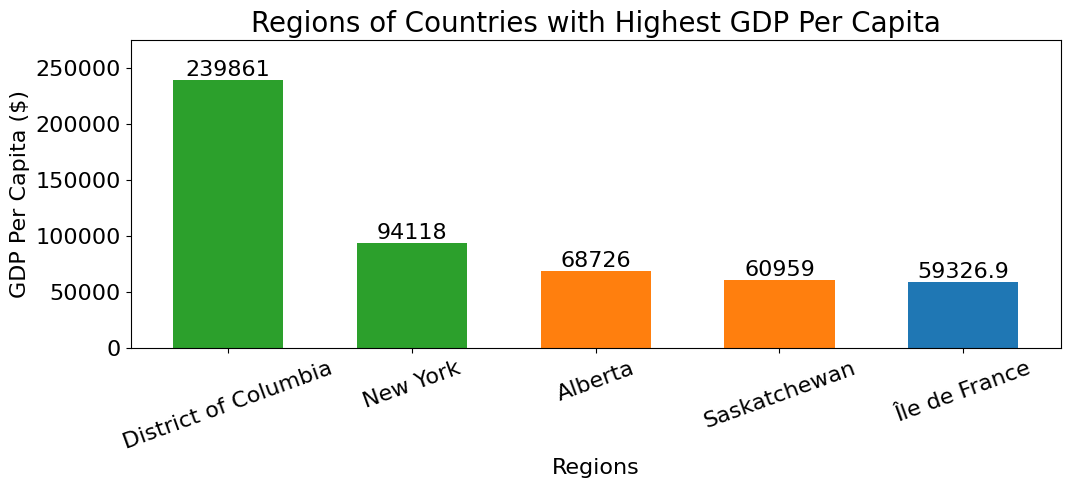

In [41]:
# Extract 5 highest GDP per Capita for large cities in US, Canada, and France
data = {'District of Columbia':239861, 'New York':94118, 'Alberta':68726,
        'Saskatchewan':60959, 'Île de France':59326.92308}

provinces_states = list(data.keys())
values = list(data.values())

plt.figure(figsize = (12, 4))
 
# creating the bar plot
m = plt.bar(provinces_states, values, width = 0.6, color=['tab:green', 'tab:green', 'tab:orange', 'tab:orange', 'tab:blue'])
plt.bar_label(m, fontsize=16)
plt.xlabel("Regions", size=16)
plt.ylabel("GDP Per Capita ($)", size=16)
plt.xticks(fontsize=16, rotation=20)
plt.yticks(fontsize=16)
plt.ylim([0, 275000])
plt.title("Regions of Countries with Highest GDP Per Capita", size=20)
plt.show()

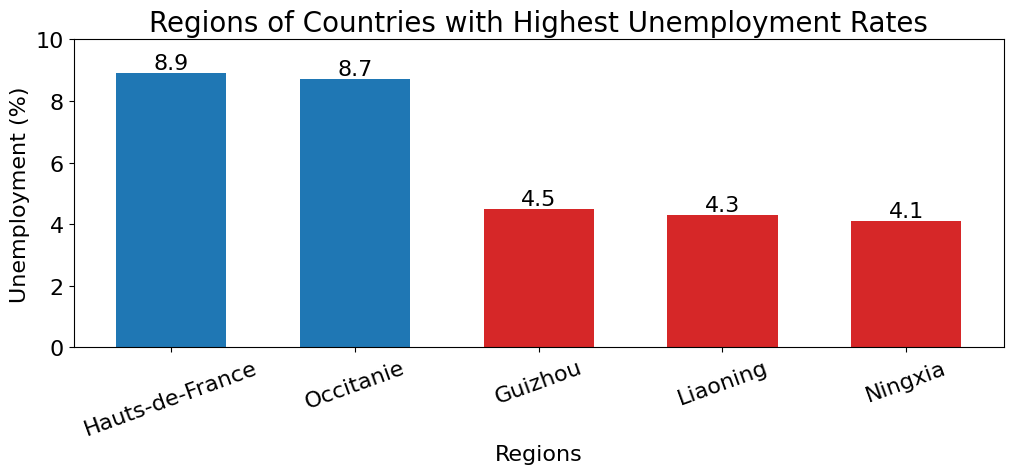

In [43]:
regional_highest_unemployement_data = {'Hauts-de-France':8.9,'Occitanie':8.7,'Guizhou':4.5,'Liaoning':4.3,'Ningxia':4.1}

provinces_states = list(regional_highest_unemployement_data.keys())
values = list(regional_highest_unemployement_data.values())

plt.figure(figsize = (12, 4))
 
# creating the bar plot
n = plt.bar(provinces_states, values, width = 0.6, color=['tab:blue', 'tab:blue', 'tab:red', 'tab:red', 'tab:red'])
plt.bar_label(n, fontsize=16)
plt.xlabel("Regions", size=16)
plt.ylabel("Unemployment (%)", size=16)
plt.xticks(fontsize=16, rotation=20)
plt.yticks(fontsize=16)
plt.ylim([0, 10])
plt.title("Regions of Countries with Highest Unemployment Rates", size=20)
plt.show()

## GDP By Country

In [28]:
# Get data out of csv files and into the program
# Data till 2020
df_GDP_current = pd.read_csv("GDP (current US$).csv")
# Data till 2020
df_GDP_capita = pd.read_csv("GDP per capita (current US$).csv")
# Data till 2021
df_inflation = pd.read_csv("Inflation, consumer prices (annual %).csv")
# Data till 2020
df_total_pop = pd.read_csv("Total Population.csv")
# Data till 2021
df_unemployed = pd.read_csv("Unemployment, total (% of total labor force) (modeled ILO estimate).csv")

countries = ['Canada', 'China', 'France', 'United States']

In [29]:
# Function to filter out every country that is not Canada (37), China (40), France (77), U.S. (251)
def getImportantContries(dataframe):
    new_df = dataframe.iloc[[35, 40, 77, 251]]
    return new_df

# Another way to cut columns from pandas dataframe
def dataframe_column_cutter(dataframe,start_position,end_position):
    return dataframe.iloc[:,start_position:end_position]

In [30]:
# Data till 2020
df_GDP_current = pd.read_csv("GDP (current US$).csv")
# Data till 2021
df_inflation = pd.read_csv("Inflation, consumer prices (annual %).csv")
# Data till 2020
df_total_pop = pd.read_csv("Total Population.csv")
# Data till 2021
df_unemployed = pd.read_csv("Unemployment, total (% of total labor force) (modeled ILO estimate).csv")


# GDP Dataset
df_GDP_current = getImportantContries(df_GDP_current)
df_GDP_current.index = ['Canada', 'China', 'France', 'United States']

# Long Term Dataset
df_GDP_current_long_cut = dataframe_column_cutter(df_GDP_current,-32,-1)
df_GDP_current_long_cut.index = ['Canada', 'China', 'France', 'United States']
df_GDP_current_long_cut = df_GDP_current_long_cut.T

# Short Term Dataset
df_GDP_current_short_cut = dataframe_column_cutter(df_GDP_current,-12,-1)
df_GDP_current_short_cut.index = ['Canada', 'China', 'France', 'United States']
df_GDP_current_short_cut = df_GDP_current_short_cut.T


# Inflation Dataset
df_inflation = getImportantContries(df_inflation)
df_inflation.index = ['Canada', 'China', 'France', 'United States']

# Long Term Dataset
df_inflation_long_cut = dataframe_column_cutter(df_inflation,-33,-1)
df_inflation_long_cut.index = ['Canada', 'China', 'France', 'United States']
df_inflation_long_cut = df_inflation_long_cut.T

# Short Term Dataset
df_inflation_short_cut = dataframe_column_cutter(df_inflation,-13,-1)
df_inflation_short_cut.index = ['Canada', 'China', 'France', 'United States']
df_inflation_short_cut = df_inflation_short_cut.T


# Total Population Dataset
df_total_pop = df_total_pop.iloc[[35, 40, 77, 251]]
df_total_pop.index = ['Canada', 'China', 'France', 'United States']

# Long Term Dataset
df_total_pop_long_cut = dataframe_column_cutter(df_total_pop,-32,-1)
df_total_pop_long_cut.index = ['Canada', 'China', 'France', 'United States']
df_total_pop_long_cut = df_total_pop_long_cut.T

# Short Term Dataset
df_total_pop_short_cut = dataframe_column_cutter(df_total_pop,-12,-1)
df_total_pop_short_cut.index = ['Canada', 'China', 'France', 'United States']
df_total_pop_short_cut = df_total_pop_short_cut.T


# Unemployment Dataset
df_unemployed = getImportantContries(df_unemployed)
df_unemployed.index = ['Canada', 'China', 'France', 'United States']

# Long Term Dataset
df_unemployed_long_cut = dataframe_column_cutter(df_unemployed,-33,-1)
df_unemployed_long_cut.index = ['Canada', 'China', 'France', 'United States']
df_unemployed_long_cut = df_unemployed_long_cut.T

# Short Term Dataset
df_unemployed_short_cut = dataframe_column_cutter(df_unemployed,-13,-1)
df_unemployed_short_cut.index = ['Canada', 'China', 'France', 'United States']
df_unemployed_short_cut = df_unemployed_short_cut.T

Canada: [(1990.0, 371103372436.875), (1990.4040404040404, 394082155781.875), (1990.8080808080808, 416990901429.0), (1991.2121212121212, 439829609378.0), (1991.6161616161617, 462598279629.125), (1992.020202020202, 485296912182.125), (1992.4242424242425, 507925507037.125), (1992.828282828283, 530484064194.125), (1993.2323232323233, 552972583653.125), (1993.6363636363637, 575391065414.25), (1994.040404040404, 597739509477.25), (1994.4444444444443, 620017915842.25), (1994.8484848484848, 642226284509.25), (1995.2525252525252, 664364615478.25), (1995.6565656565656, 686432908749.125), (1996.060606060606, 708431164322.125), (1996.4646464646464, 730359382197.125), (1996.8686868686868, 752217562374.125), (1997.2727272727273, 774005704853.0), (1997.6767676767677, 795723809634.0), (1998.080808080808, 817371876717.0), (1998.4848484848485, 838949906101.875), (1998.888888888889, 860457897788.875), (1999.2929292929293, 881895851777.75), (1999.6969696969697, 903263768068.625), (2000.1010101010102, 9245

<Figure size 640x480 with 0 Axes>

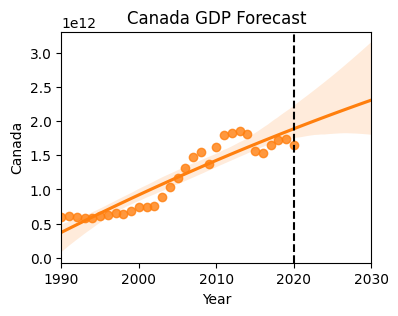

<Figure size 640x480 with 0 Axes>

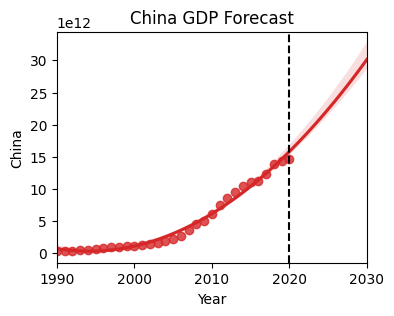

<Figure size 640x480 with 0 Axes>

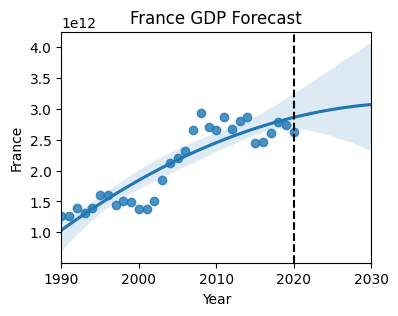

<Figure size 640x480 with 0 Axes>

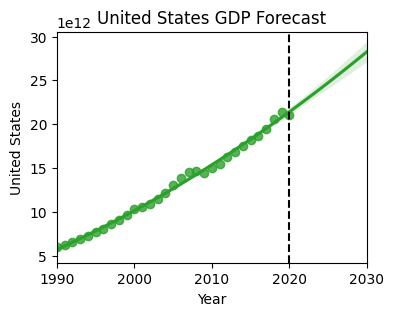

In [47]:
# GDP Long Term

x = df_GDP_current_long_cut.index
x_new = np.int64(x)

# GDP Per Country
for count, var in enumerate(countries):
    plt.figure() # Creating a rectangle (figure) for each plot
    fig, ax = plt.subplots(figsize=(4, 3))
    xlim = [1990, 2030]
    ax.set_xlim(xlim)
    # Add ylim to limit y-axis to certain values
    # ylim = [0, 50]
    # ax.set_ylim(ylim)
    if count == 0:
        color = 'tab:orange'
    elif count == 1:
        color = color='tab:red'
    elif count == 2:
        color = color='tab:blue'
    elif count == 3:
        color = color='tab:green'
    graph = sns.regplot(x=x_new, y=var, data=df_GDP_current_long_cut, order=2, color= color, truncate=False, ax=ax).set(title=f'{var} GDP Forecast');
    x1 = ax.get_lines()[0].get_xdata()
    y1 = ax.get_lines()[0].get_ydata()
    # print(x1)
    # print(y1)
    print(f'{var}: ' + str(list(zip(x1, y1))))
    final_data = list(zip(x1, y1))
    # This will add label to X-axis
    plt.xlabel("Year")
    plt.ticklabel_format(style='sci', axis='y', scilimits=(12,12))
    # Create vertical line to distinguish future values
    plt.axvline(x = 2020, ymin = 0, ymax = 1000000000000000, color ='black', linestyle='--')
    graph

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1ac77d8c-6104-40ce-94f9-fbd01a76a8e9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>